In [51]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [38]:
file_path = "./data/metadata_H_80_train.json"
pairfile_path = "./data/고_pair_20210219/metadata_H_pair_train_80.json"

In [5]:
df=pd.read_json(file_path)

In [7]:
df.abs

<bound method NDFrame.abs of                                     environmental_factors  \
0       {'illumination': 0, 'temp_inside': 0.0, 'camer...   
1       {'illumination': 0, 'temp_inside': 0.0, 'camer...   
2       {'illumination': 0, 'temp_inside': 0.0, 'camer...   
3       {'illumination': 0, 'temp_inside': 0.0, 'camer...   
4       {'illumination': 0, 'temp_inside': 0.0, 'camer...   
...                                                   ...   
286737  {'illumination': 430, 'temp_inside': 20.1, 'ca...   
286738  {'illumination': 430, 'temp_inside': 20.1, 'ca...   
286739  {'illumination': 430, 'temp_inside': 20.1, 'ca...   
286740  {'illumination': 430, 'temp_inside': 20.1, 'ca...   
286741  {'illumination': 430, 'temp_inside': 20.1, 'ca...   

                                       individual_factors  \
0       [{'camera_temp': 36.6, 'individual_temp': 0.0,...   
1       [{'camera_temp': 36.4, 'individual_temp': 0.0,...   
2       [{'camera_temp': 36.4, 'individual_temp': 0.0,.

In [13]:
with open(file_path, 'r', encoding="UTF-8") as fp:
    jsdata = json.load(fp)

In [39]:
with open(pairfile_path, 'r', encoding="UTF-8") as fp:
    pairjs = json.load(fp)

In [40]:
len(jsdata), len(pairjs)

(286742, 2551)

In [22]:
print(jsdata[0])

{'environmental_factors': {'illumination': 0, 'temp_inside': 0.0, 'camera_type': 'H', 'temp_outside': 0.0, 'humid_outside': 0.0, 'place': 'A1', 'day': '20201012', 'humid_inside': 0.0, 'hms': '075143', 'image_type': 'T', 'wind': 0.0}, 'individual_factors': [{'camera_temp': 36.6, 'individual_temp': 0.0, 'distance': 5, 'bbox': [1056, 524, 179, 211], 'optional': {'gender': 'male', 'body_type': 'normal', 'mask_exists': True, 'tall': '120-180', 'is_short_sleeve': False, 'age': 'middle-age', 'outer_exists': True}}], 'technical_factors': {'bbody_temp': '35℃', 'netd': '≤50mK', 'range_of_spectrum': '8~14㎛', 'model': 'DH-TPC-BF3221-T', 'temperature_range': '30~45℃', 'temperature_accuracy': '±0.3℃ w/blackbody', 'resolution': '1280x960', 'bbody_emissivity': '0.97±0.02'}, 'image_id': 'A1_H_T_20201012_075143'}


In [41]:
print(pairjs[0])

{'environmental_factors': {'illumination': 328, 'temp_inside': 21.3, 'camera_type': 'H', 'temp_outside': 12.1, 'humid_outside': 30.0, 'place': 'A1', 'day': '20201110', 'humid_inside': 23.0, 'hms': '120952', 'image_type': 'T', 'wind': 1.5}, 'individual_factors': [{'camera_temp': 35.9, 'individual_temp': 36.1, 'distance': 5, 'bbox': [898, 506, 224, 235], 'optional': {'gender': 'male', 'body_type': 'normal', 'mask_exists': True, 'tall': '120-180', 'is_short_sleeve': False, 'age': 'middle-age', 'outer_exists': True}}], 'technical_factors': {'bbody_temp': '35℃', 'netd': '≤50mK', 'range_of_spectrum': '8~14㎛', 'model': 'DH-TPC-BF3221-T', 'temperature_range': '30~45℃', 'temperature_accuracy': '±0.3℃ w/blackbody', 'resolution': '1280x960', 'bbody_emissivity': '0.97±0.02'}, 'image_id': 'A1_H_T_20201110_120952'}


In [21]:
jsdata[0]['individual_factors']

[{'camera_temp': 36.6,
  'individual_temp': 0.0,
  'distance': 5,
  'bbox': [1056, 524, 179, 211],
  'optional': {'gender': 'male',
   'body_type': 'normal',
   'mask_exists': True,
   'tall': '120-180',
   'is_short_sleeve': False,
   'age': 'middle-age',
   'outer_exists': True}}]

In [46]:

temp_dic = {}
for person in jsdata:
    temp_outside = person['individual_factors'][0]['individual_temp']
    
    if temp_outside in temp_dic:
        temp_dic[temp_outside] += 1
    else:
        temp_dic[temp_outside] = 1

In [54]:
del temp_dic[0.0]
sorted_dict = sorted(temp_dic.items())
print(sorted_dict)

[(0.1, 1), (1.0, 1), (2.0, 1), (3.0, 1), (4.0, 1), (9.0, 1), (32.0, 13), (32.1, 4), (32.2, 6), (32.3, 2), (32.4, 1), (32.5, 1), (32.6, 1), (32.8, 1), (33.1, 1), (33.4, 1), (33.6, 1), (33.7, 1), (33.8, 2), (34.0, 3), (34.1, 3), (34.2, 6), (34.3, 4), (34.4, 3), (34.5, 5), (34.6, 6), (34.7, 4), (34.8, 10), (34.9, 10), (35.0, 8), (35.1, 9), (35.2, 26), (35.3, 32), (35.4, 37), (35.5, 43), (35.6, 43), (35.7, 65), (35.8, 66), (35.9, 85), (36.0, 143), (36.1, 160), (36.2, 181), (36.3, 202), (36.4, 232), (36.5, 319), (36.6, 321), (36.7, 296), (36.8, 311), (36.9, 285), (37.0, 187), (37.1, 123), (37.2, 109), (37.3, 66), (37.4, 38), (37.5, 18), (37.6, 13), (37.7, 2), (38.7, 1)]


(array([3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.900e+01, 5.000e+01,
        2.278e+03, 1.153e+03]),
 array([ 0.1 ,  2.03,  3.96,  5.89,  7.82,  9.75, 11.68, 13.61, 15.54,
        17.47, 19.4 , 21.33, 23.26, 25.19, 27.12, 29.05, 30.98, 32.91,
        34.84, 36.77, 38.7 ]),
 <BarContainer object of 20 artists>)

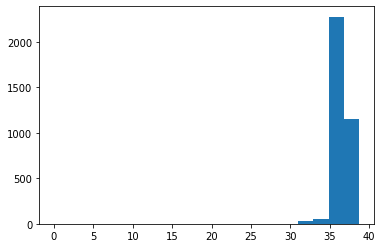

In [55]:
mylist = [key for key, val in temp_dic.items() for _ in range(val)]
plt.hist(mylist, bins=20)